<h2>Beast cancer</h2>
<blockquote>Breast cancer is a dataset records clinical measurements of breast cancer tumors. Each tumor is labeled as 'benign'(harmless tumors) or 'malignant'(dangerous tumors). Let's try to find best algorithms with best accuracy. In this notebook we try on 4 different algorithms<br>
    <ol>1.Logisticregression</ol>
    <ol>2.Decision Tree</ol>
    <ol>3.Random Forest</ol>
    <ol>4.Neural Network

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

cancer=load_breast_cancer()


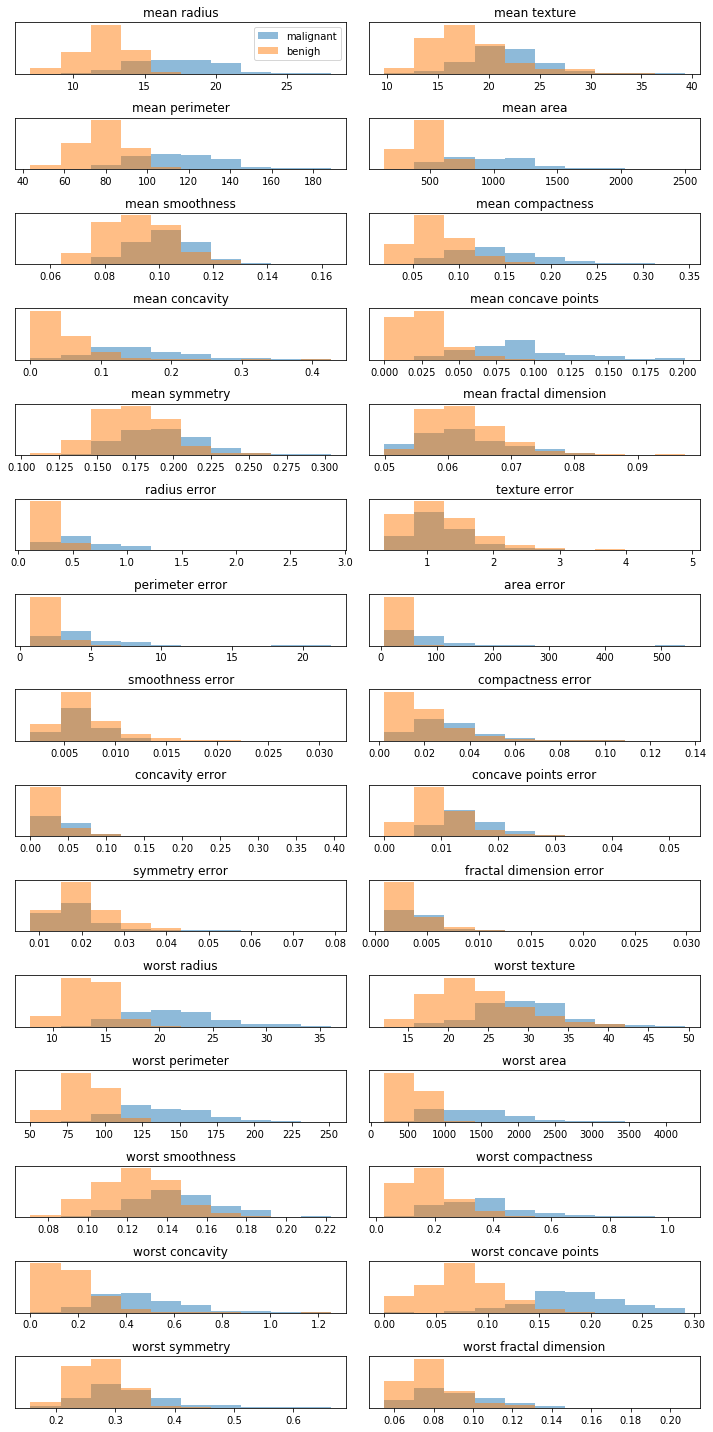

In [26]:
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]


ax=axes.ravel()


for i in range(30):
    _,bins=np.histogram(cancer.data[:,i])
    ax[i].hist(malignant[:,i],bins=bins,alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].legend(['malignant','benigh'])
fig.tight_layout()

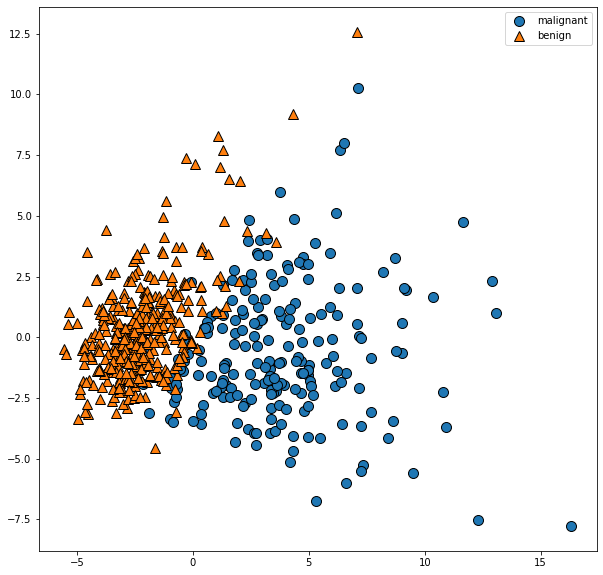

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(cancer.data)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

import mglearn 

plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names)


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,cancer.target,stratify=cancer.target,random_state=10)

<h2>Logistic Regression Classifier

In [32]:
loreg=LogisticRegression()
loreg.fit(X_train,y_train)
print('accuracy on training set : ',loreg.score(X_train,y_train))
print('accuracy on test set : ',loreg.score(X_test,y_test))

accuracy on training set :  0.9906103286384976
accuracy on test set :  0.972027972027972


In [33]:
from sklearn.model_selection import GridSearchCV,cross_val_score

param={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(max_iter=2000),param,cv=5)
grid.fit(X_train,y_train)
grid.best_score_

0.969466484268126

<h2>Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=5,random_state=10)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.965034965034965

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

Text(0.5, 0, 'feature importance in decision tree')

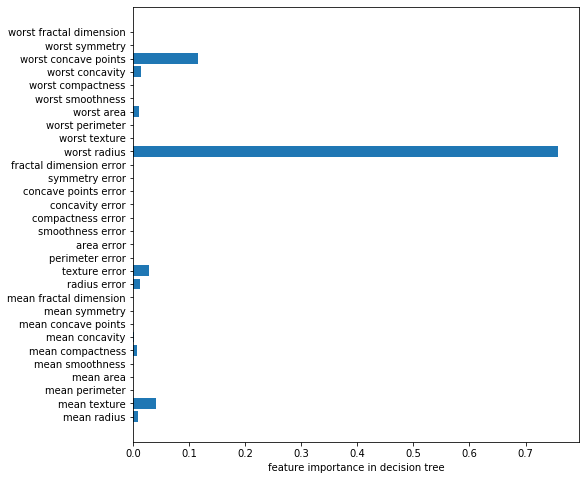

In [36]:
def plot(model):
    plt.figure(figsize=(8,8))
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_)
    plt.yticks(np.arange(n_features),cancer.feature_names)
    
plot(tree)
plt.xlabel('feature importance in decision tree')

<h2>Random Forset Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

n_features=int(np.sqrt(cancer.data.shape[1]))

RF=RandomForestClassifier(n_estimators=1000,max_features=n_features).fit(X_train,y_train)
print('accuracy on training set : ',RF.score(X_train,y_train))
print('accuracy on test set : ',RF.score(X_test,y_test))

accuracy on training set :  1.0
accuracy on test set :  0.9440559440559441


Text(0.5, 0, 'feature importance in random forest')

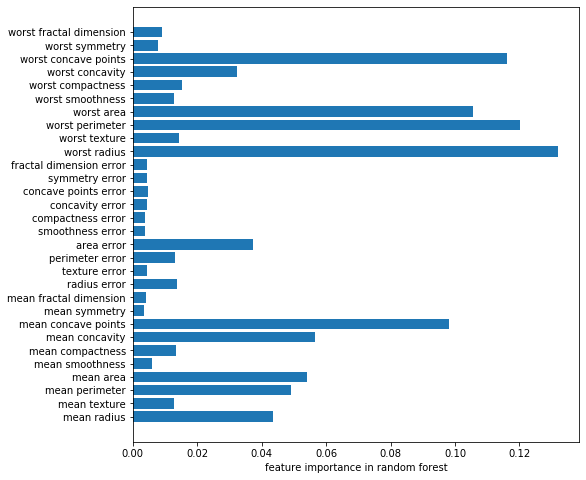

In [8]:
plot(RF)
plt.xlabel('feature importance in random forest')

<h2>Neural Network classifier

In [41]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=78,max_iter=1000).fit(X_train,y_train)
print('Accuracy on training set :',mlp.score(X_train,y_train))
print('Accuracy on test set :',mlp.score(X_test,y_test))

Accuracy on training set : 1.0
Accuracy on test set : 0.9790209790209791
